In [1]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("Blues_d", n_colors=10, desat=1))

In [8]:
# using pre-built sequential model rather than custom made class. 
# Equivilent to previous notebook (pytorch04)

input_size   = 784
hidden_sizes = (128,64)
output_size  = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

In [9]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# download and load MNIST training data:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

In [12]:
out = model.forward(images.view(64,-1))

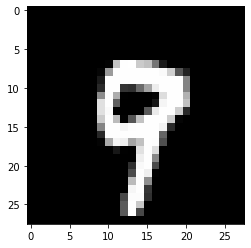

In [14]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

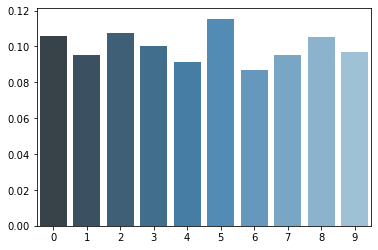

In [16]:
sns.barplot(x=np.arange(10), y=out[0].detach().numpy())